<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

df = df[['sepal width (cm)','petal length (cm)','target']]
df.head()

,sepal width (cm),petal length (cm),target
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [3]:
from sklearn.model_selection import train_test_split
x = df.drop('target',axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)

model.score(x_test,y_test)   #正確率預測

0.98

In [5]:
#標準化data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(),KNeighborsClassifier())
model_pl.fit(x_train,y_train)
model_pl.score(x_test,y_test)

0.92

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = model_pl.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19  0  0]
 [ 0 12  3]
 [ 0  1 15]]
0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.80      0.86        15
           2       0.83      0.94      0.88        16

    accuracy                           0.92        50
   macro avg       0.92      0.91      0.91        50
weighted avg       0.92      0.92      0.92        50



In [12]:
#選擇n_neighbors
accs = []
for n in range(3,8):
  model_pl = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=n))
  model_pl.fit(x_train,y_train)
  accs.append(model_pl.score(x_test,y_test))
  print(f'neighbor:{n},accurarcy:{model_pl.score(x_test,y_test)}')

neighbor:3,accurarcy:0.94
neighbor:4,accurarcy:0.9
neighbor:5,accurarcy:0.92
neighbor:6,accurarcy:0.9
neighbor:7,accurarcy:0.9


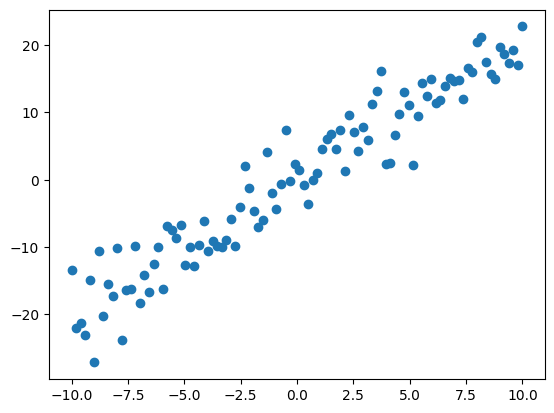

In [13]:
#PCA主成分分析 降維資料
np.random.seed(1)
x = np.linspace(-10,10,100)
y = 2*x + 4*np.random.randn(100)
df_pca = pd.DataFrame(zip(x,y),columns=['x0','x1'])
plt.scatter(x,y)

In [15]:
#將維度 並最大化保留變異程度
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_pca = pca.fit_transform(df_pca)
x_pca[:5]

array([[-16.64465063],
       [-24.34275306],
       [-23.58673821],
       [-25.12086528],
       [-17.60504644]])

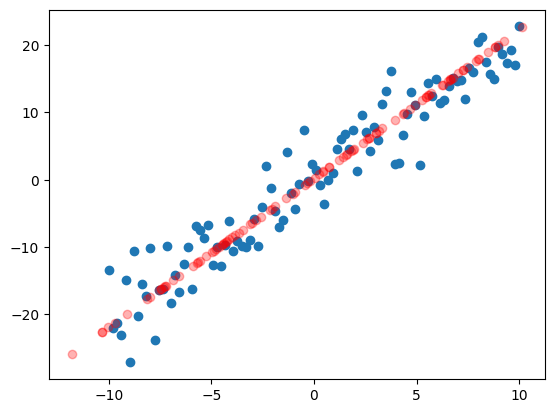

In [16]:
plt.scatter(x,y)
x_new = pca.inverse_transform(x_pca)
plt.scatter(x_new[:,0],x_new[:,1],c='r',alpha=0.3)

In [17]:
print(f'PCA 轉換係數:{pca.components_}')
xy_0 = np.array([x[0],y[0]])

print(f'第一筆原始資料：{xy_0}')

#內積
print(f'內積結果：{np.sum(pca.components_*xy_0)}')
print(f'主成分第一筆資料：{x_pca[0]}')

PCA 轉換係數:[[0.41212534 0.91112716]]
第一筆原始資料：[-10.         -13.50261855]
內積結果：-16.423855899685528
主成分第一筆資料：[-16.64465063]


In [18]:
#pipiline 進行PCA(2)
model_pl = make_pipeline(StandardScaler(),PCA(n_components=2),KNeighborsClassifier())
model_pl.fit(x_train,y_train)
y_pred = model_pl.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19  0  0]
 [ 0 12  3]
 [ 0  1 15]]
0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.80      0.86        15
           2       0.83      0.94      0.88        16

    accuracy                           0.92        50
   macro avg       0.92      0.91      0.91        50
weighted avg       0.92      0.92      0.92        50



In [21]:
#SelectKBest
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=2)     #選出最好的兩個特徵值
selector.fit(x_train,y_train)
selector.get_support()

array([ True,  True])

In [22]:
x_test.columns[selector.get_support()]

Index(['sepal width (cm)', 'petal length (cm)'], dtype='object')